# LSTM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'matplotlib'

In [19]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
data = pd.read_csv('/content/drive/MyDrive/5293/Stock_Goog.csv', date_parser = True)

data_training = data[data['Date'] < '2021-01-01'].copy()
data_training = data_training.drop(columns = ['Date','Adj Close'], axis = 1)

data_test = data[data['Date'] >= '2021-01-01'].copy()
data_test = data_test.drop(columns = ['Date','Adj Close'], axis = 1)


In [21]:
#Scaling
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.00000000e+00, 9.96460606e-04, 0.00000000e+00, 2.32515229e-03,
        3.13842604e-01],
       [3.02678068e-03, 2.21774475e-03, 2.22046735e-03, 1.72004762e-03,
        2.57973342e-01],
       [1.48663793e-03, 0.00000000e+00, 8.69506051e-04, 0.00000000e+00,
        1.77899019e-01],
       ...,
       [9.75129849e-01, 9.72245293e-01, 9.79627474e-01, 9.45460846e-01,
        3.53162654e-02],
       [9.40373753e-01, 9.44719054e-01, 9.67197699e-01, 9.49869847e-01,
        5.84944089e-03],
       [9.61923204e-01, 9.69487131e-01, 9.82778799e-01, 9.57197654e-01,
        1.00323813e-02]])

In [22]:
x_train = []
y_train = []
for i in range(8, data_training.shape[0]):
    x_train.append(data_training[i-8:i])
    y_train.append(data_training[i, 0])

In [23]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [25]:
regressor = Sequential()

regressor.add(LSTM(units = 8, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 8, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 10, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 12, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 8, 8)              448       
                                                                 
 dropout_8 (Dropout)         (None, 8, 8)              0         
                                                                 
 lstm_9 (LSTM)               (None, 8, 8)              544       
                                                                 
 dropout_9 (Dropout)         (None, 8, 8)              0         
                                                                 
 lstm_10 (LSTM)              (None, 8, 10)             760       
                                                                 
 dropout_10 (Dropout)        (None, 8, 10)             0         
                                                                 
 lstm_11 (LSTM)              (None, 12)               

In [26]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
27/27 [==============================] - 7s 30ms/step - loss: 0.1110
Epoch 2/50
27/27 [==============================] - 1s 27ms/step - loss: 0.0586
Epoch 3/50
27/27 [==============================] - 1s 27ms/step - loss: 0.0283
Epoch 4/50
27/27 [==============================] - 1s 29ms/step - loss: 0.0195
Epoch 5/50
27/27 [==============================] - 1s 27ms/step - loss: 0.0131
Epoch 6/50
27/27 [==============================] - 1s 28ms/step - loss: 0.0120
Epoch 7/50
27/27 [==============================] - 1s 18ms/step - loss: 0.0136
Epoch 8/50
27/27 [==============================] - 1s 19ms/step - loss: 0.0095
Epoch 9/50
27/27 [==============================] - 0s 18ms/step - loss: 0.0095
Epoch 10/50
27/27 [==============================] - 1s 19ms/step - loss: 0.0090
Epoch 11/50
27/27 [==============================] - 0s 18ms/step - loss: 0.0090
Epoch 12/50
27/27 [==============================] - 0s 18ms/step - loss: 0.0082
Epoch 13/50
27/27 [==================

In [27]:
inputs = scaler.transform(data_test)
X_test = []
y_test = []

for i in range(8, inputs.shape[0]):
    X_test.append(inputs[i-8:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((108, 8, 5), (108,))

In [28]:
#Predicting
y_pred = regressor.predict(X_test)
#scaling scale
scale = 1/scaler.scale_[0]
y_pred = y_pred * scale
y_test = y_test * scale

4/4 [==============================] - 1s 5ms/step


In [29]:
len(y_test)
data_test.shape

(116, 5)

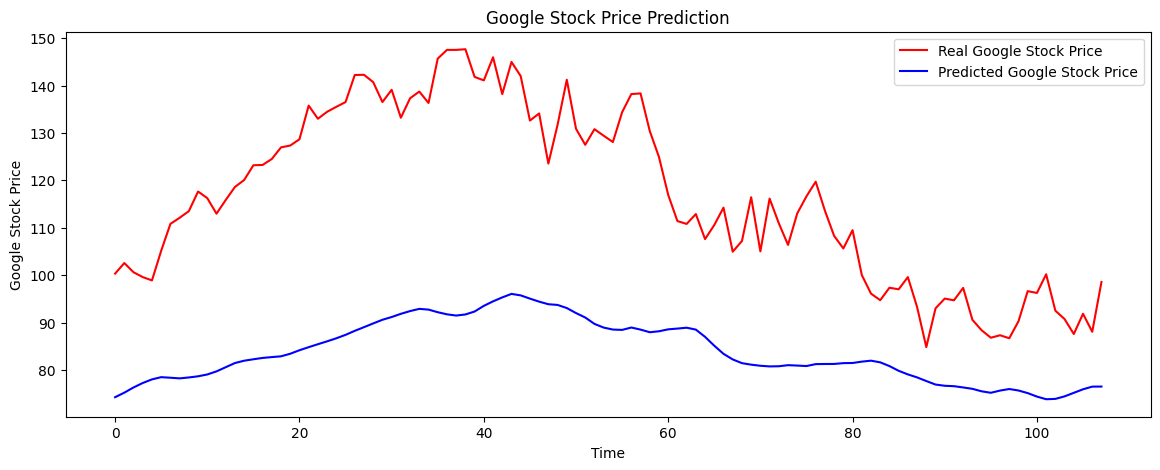

In [30]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()